# Introduction to the Job Shop Scheduling Problem

The Job Shop Scheduling Problem (JSSP) is a classic optimization problem in operations research and computer science. It involves scheduling jobs on machines with the goal of optimizing a certain objective, such as minimizing the total time required to complete all jobs. We'll create a simple example with three jobs and three machines and demonstrate how to solve this problem using Google's Operations Research tools, specifically the OR-Tools package.

### What is the Job Shop Scheduling Problem?
The Job Shop Scheduling Problem is a fundamental and highly studied problem in operations research and computer science [[1]](https://www.sciencedirect.com/science/article/pii/S0305054812000500#bib24), with its origins tracing back to the mid-20th century. Historically, the JSSP emerged from the need to optimize manufacturing and production processes, especially in the context of increasing industrialization and the growing complexity of manufacturing systems.

The problem itself involves scheduling a set of jobs $J$, each consisting of a sequence of operations ${O_1, O_2, ..., O_n}$, on a set of machines $M$. Each job has a specific order in which its operations need to be processed, and each operation requires a specific machine for a certain duration. The complexity arises from constraints: no machine can process more than one operation at a time, and once a operation is started, it must run to completion without interruption.

### Example Problem
Let's consider a small instance with three jobs and three machines. The jobs have different tasks, each requiring a specific machine and processing time:

- Job 1: Task 1 (Machine 1, 3 units), Task 2 (Machine 2, 2 units), Task 3 (Machine 3, 2 units)
- Job 2: Task 1 (Machine 3, 4 units), Task 2 (Machine 1, 1 unit)
- Job 3: Task 1 (Machine 2, 5 units), Task 2 (Machine 3, 3 units)

In [1]:
from gnn_scheduler.jssp import Operation, JobShopInstance

jobs = [
    [Operation(machine_id=0, duration=3), Operation(1, 2), Operation(2, 2)],
    [Operation(2, 4), Operation(0, 1)],
    [Operation(1, 5), Operation(2, 3)],
]

# We can now create a `JobShopInstance` object from this list of jobs:
jssp = JobShopInstance(jobs, name="Example")

In [2]:
# The number of jobs and machines can be accessed via the `n_jobs` 
# and `n_machines` attributes that are automatically computed from the jobs:
jssp.n_jobs, jssp.n_machines

(3, 3)

### Representing the Problem as a Graph

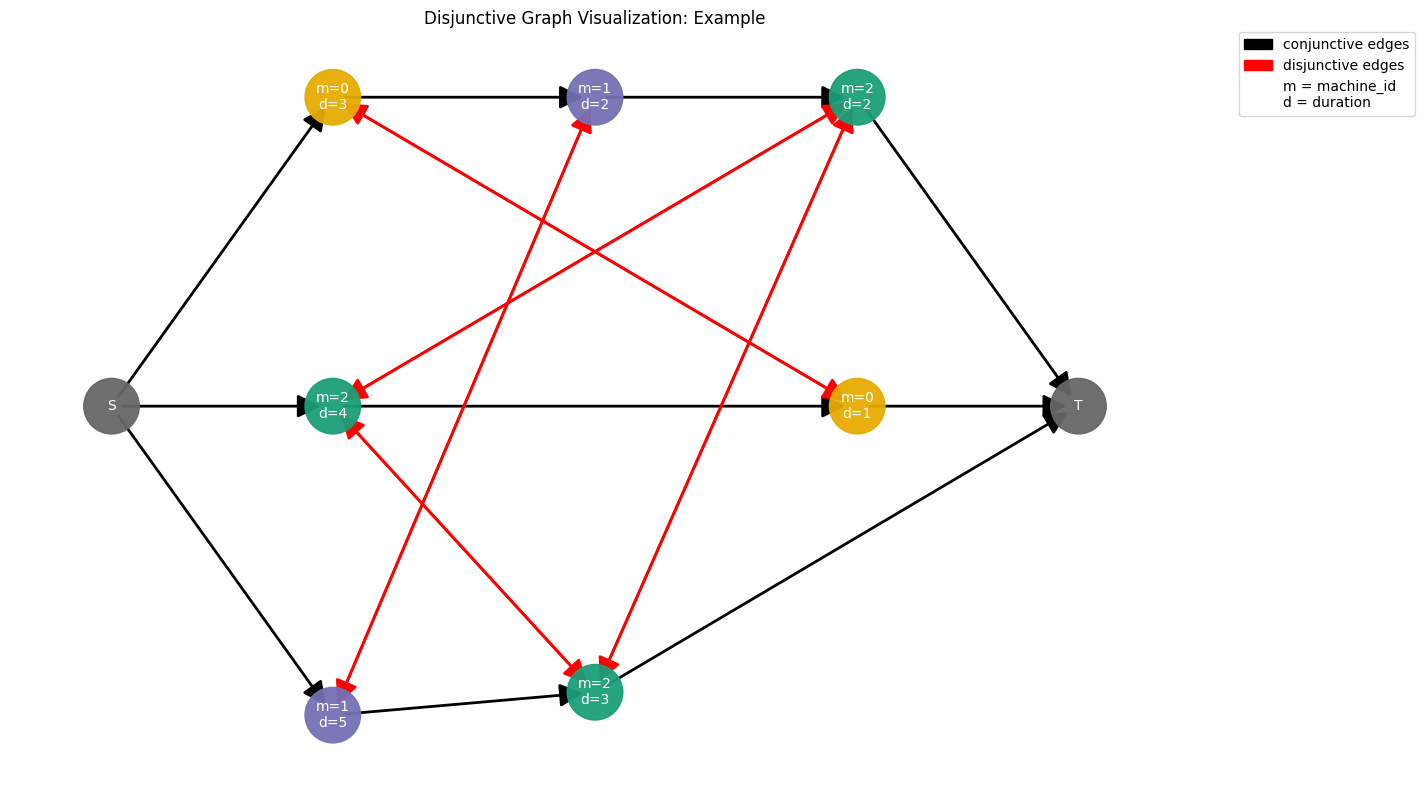

In [3]:
fig = jssp.plot_disjunctive_graph()

### Loading an Instance from a File

In [4]:
import os

DATA_DIR = os.path.abspath("../data")

In [5]:
INSTANCE_PATH = os.path.join(DATA_DIR, "raw/ft06")
ft06_instance = JobShopInstance.load_from_file(INSTANCE_PATH, name="ft06")

In [6]:
ft06_instance.n_jobs, ft06_instance.n_machines

(6, 6)

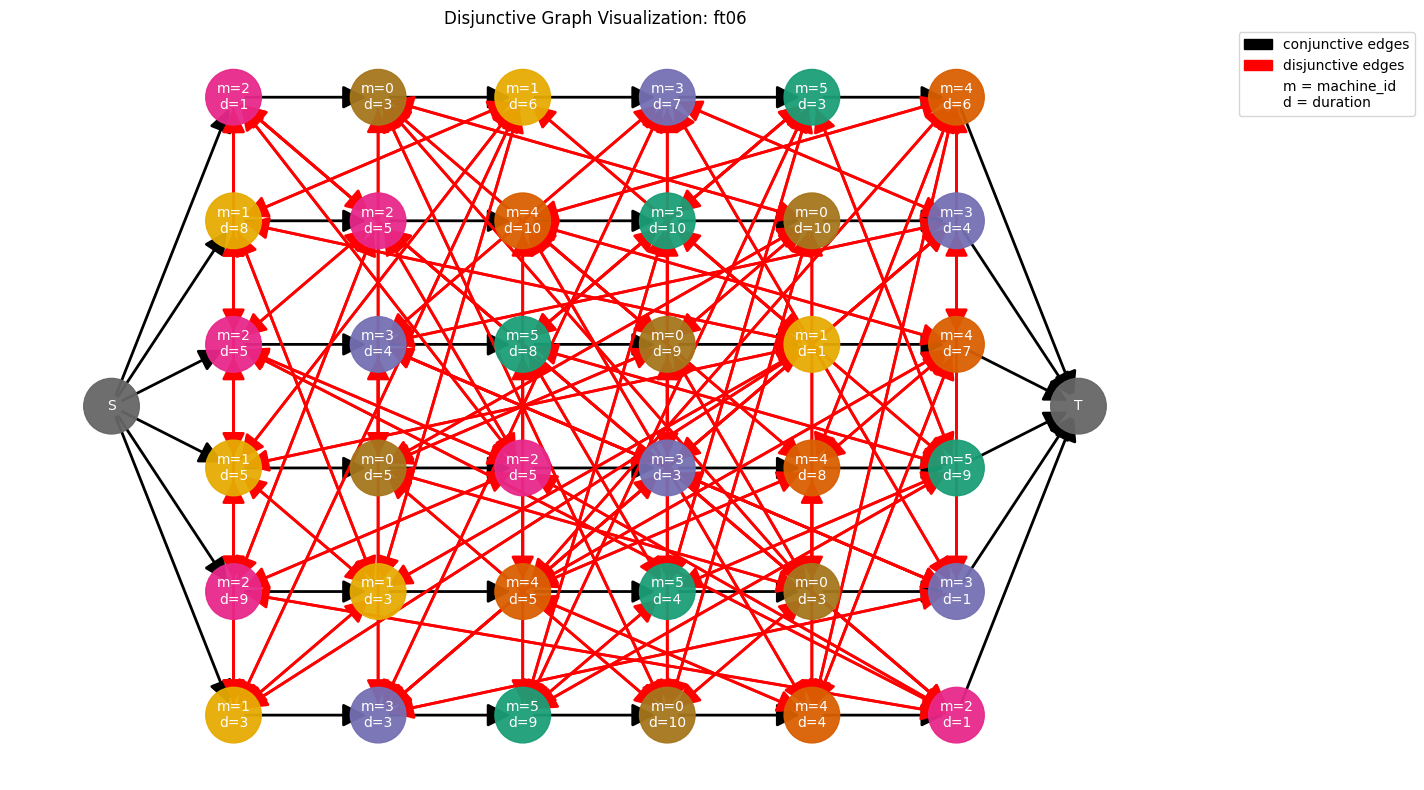

In [7]:
ft06_instance.plot_disjunctive_graph();

In [8]:
# Let's see how many edges there are in the disjunctive graph:
ft06_instance.disjunctive_graph.number_of_edges()

222

We also can simply load each file with the method `.from_benchmark`

In [9]:
abz5_instance = JobShopInstance.load_from_benchmark(DATA_DIR, "abz5")

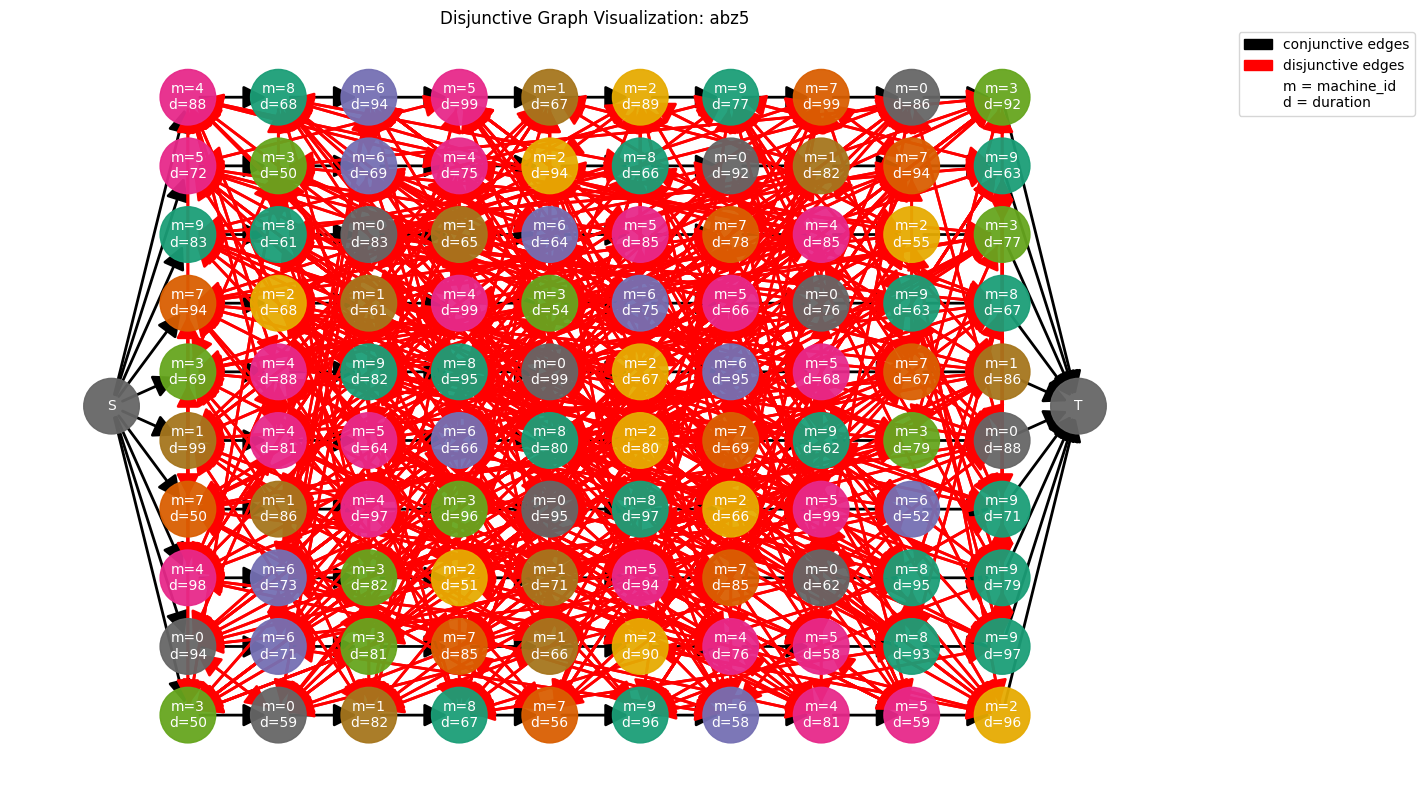

In [10]:
abz5_instance.plot_disjunctive_graph();

Loading this way we have access to attributes such as the optimum

In [11]:
abz5_instance.optimum

1234

In [12]:
abz5_instance.bounds

(None, None)

Or the bounds if the optimum it is not known

In [13]:
swv15_instance = JobShopInstance.load_from_benchmark(DATA_DIR, "swv15")
swv15_instance.bounds

(2885, 2904)

In [15]:
swv15_instance.disjunctive_graph.number_of_edges()

25050

In [16]:
swv15_instance.disjunctive_graph.number_of_nodes()

502

In [17]:
swv15_instance.n_jobs, swv15_instance.n_machines

(50, 10)